<a href="https://colab.research.google.com/github/denisecammarota/data-science-course/blob/main/StatisticsRClasses/ABTest_ClassCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Class in Statistics and Hypotesis Testing with R

## Introduction to some probability distributions in R

### Gaussian Function

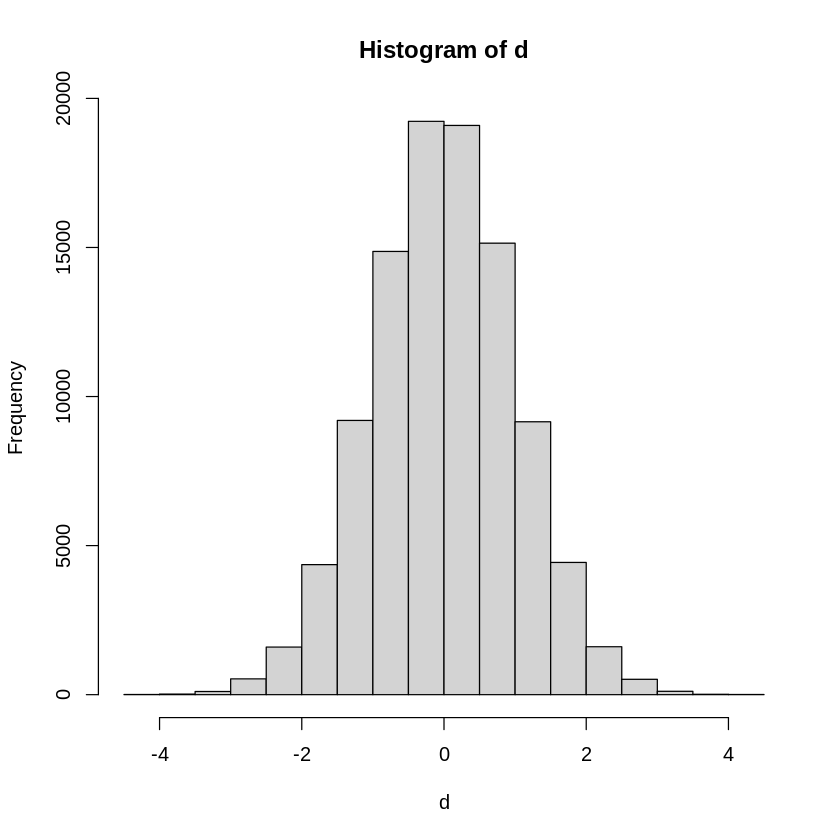

In [1]:
d <- rnorm(100000,0,1)
hist(d)

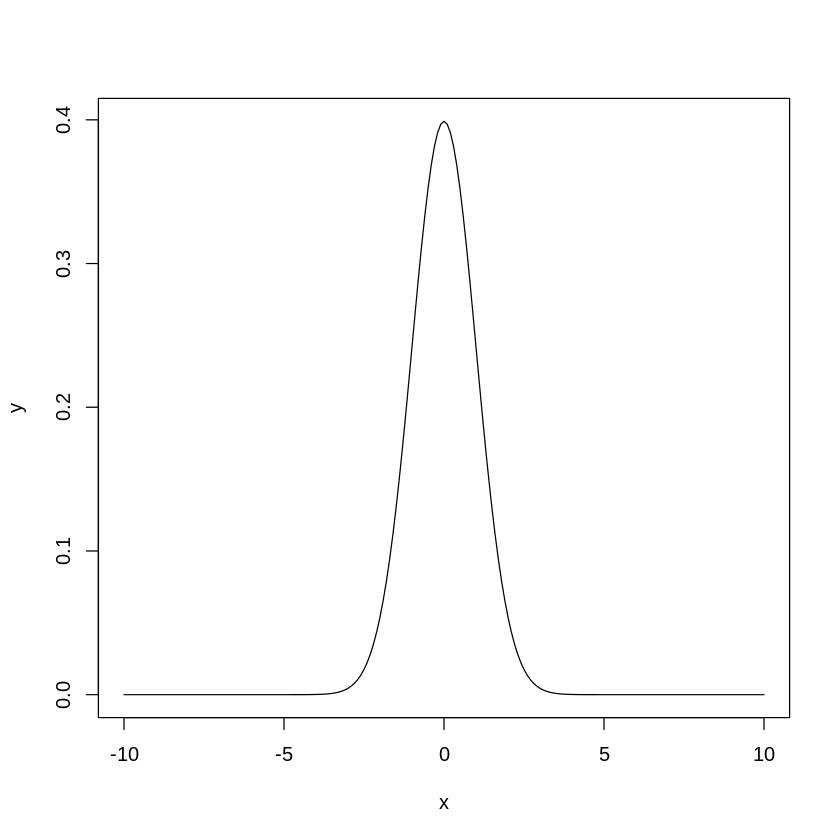

In [3]:
x <- seq(-10,10,0.1)
y <- dnorm(x,0,1)
plot(x,y,'l')

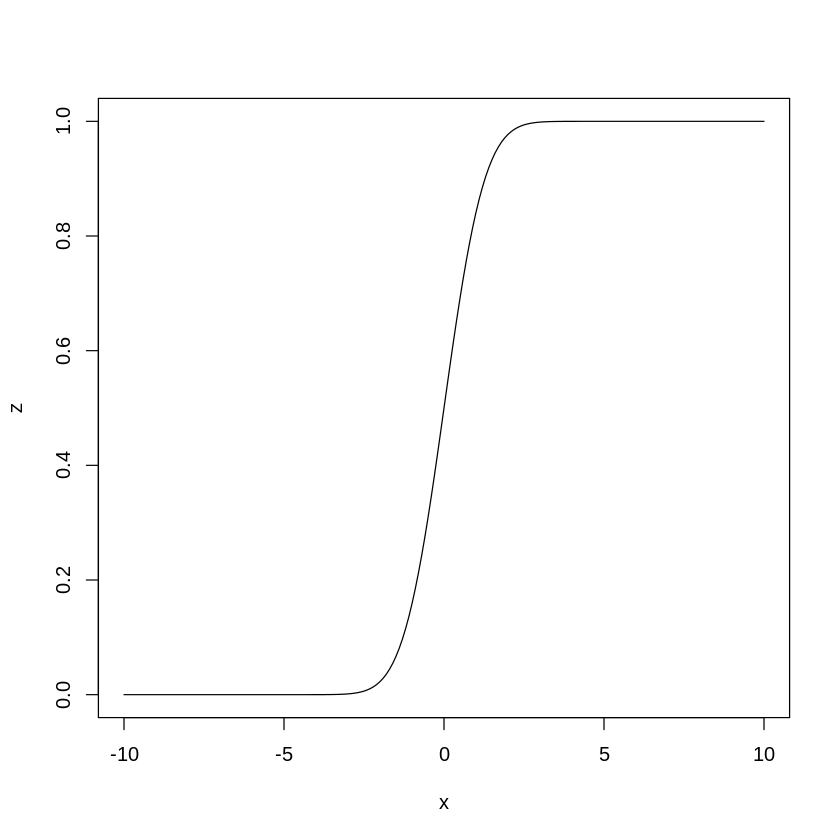

In [4]:
z <- pnorm(x,0,1)
plot(x,z,'l')

### Other distributions and their abbreviations
- Poisson pois
- Chi Squared chisq
- Student's t t 
- Log Normal lnorm
- Uniform unif
- Exponential exp

With possible suffixes being:
- d probability density
- r random sample of distribution
- p probability cumulated
- q number so that cumulate probability is a certain amount

## Hypotesis Testing 

Steps to hypotesis testing:
- Write null and alternative hypoteses 
- Identify test type
- Find the normalized variable formula
- Calculate normalized variable
- Define region of acceptance and region of rejection for the null hypotesis (clearly depends on the type of test we're talking about)
- Identify where the normalized variable is located and either accept or reject the null hypotesis

### Example: Software development 

- Qi = Quality of the software development
- Tipo.desarrollo = Type of development, either T (traditional) or XP (extreme)

Where we want two compare the two methodologies for development, the traditional and the extreme one. 

Null hypotesis: both methodologies are the same
Alternative one: they are not

Therefore, we test the means while not knowing the standard deviation (std). This reduces are possibilities to two: the std is the same or it is not the same. 



In [19]:
h = read.csv("datos.csv",skip=1,header=FALSE,sep=";")

In [32]:
colnames(h) <- c('Aplicacion','Tipo.desarrollo','Costo.x.PF','Costo.Bug','Bug.x.PF','Qi')

To check this, we are going to refer to the data and compute the std. However, before that, we need to convert the commas in Qi to points, since R won't otherwise recognize them correctly. Then, we will separate by methodology. 

In [36]:
h$Qi <- gsub(",",".",h$Qi)
h$Qi <- as.numeric(h$Qi)

In [38]:
ht <- h[which(h$Tipo.desarrollo == "T"),]
hxp <- h[which(h$Tipo.desarrollo == "XP"),]

Let's calculate then both the mean and the std of Qi for both, as well as the amount of observations each. They appear to be very different, and that's why we will use the test with unkown different std. 

In [44]:
mt <- mean(ht$Qi)
mxp <- mean(hxp$Qi)
st <- sd(ht$Qi)
sxp <- sd(hxp$Qi)
nt <- nrow(ht)
nxp <- nrow(hxp)

In [42]:
print(paste('Std for T: ',st))
print(paste('Std for XP: ',sxp))

[1] "Std for T:  201.88595881828"
[1] "Std for XP:  407.035332087549"


In [43]:
print(paste('Mean for T: ',mt))
print(paste('Mean for XP: ',mxp))

[1] "Mean for T:  2274.353441625"
[1] "Mean for XP:  2757.10533175"


In [45]:
print(paste('Amount of observations for T: ',nt))
print(paste('Amount of observations for XP: ',nxp))

[1] "Amount of observations for T:  8"
[1] "Amount of observations for XP:  12"


Therefore, we have that the normalized variable is in fact, from our class table:

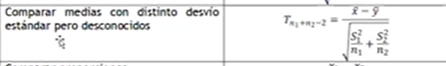

In [48]:
t <- (mt-mxp)/sqrt(st**2/nt+sxp**2/nxp)
print(paste('Value of normalized variable t: ',t))

[1] "Value of normalized variable t:  -3.51138972164347"


Now there are two alternatives:
- calculate probability and compare it with our tolerance for the problem
- calculate acceptance and rejection regions

Let's do the last one. First, we are going to stablish probabilities threshold of 90%, with 5% on each tail of the probability. The acceptance region begins at 5% and ends at 95%. 

In [49]:
vz <- c(.05,.95)

Now we will see for the t student distribution where that values are acquired for vz. The other parameter are the degrees of freedom (dof) = n1 + n2 - 2 (from the formula)

In [50]:
qt(vz,nt+nxp-2)

[1] -1.734064  1.734064

Since t is outside of this acceptance region, the null hypotesis is rejected. Let's do this with the probabilities, for this we need to use the function pt which gives us the probability with the same parameter of dof. Again, this shields us a number outside of the accepting region. 

In [51]:
pt(t,nt+nxp-2)

[1] 0.001246436